In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, SeparableConv2D
from keras.layers import MaxPooling2D, AvgPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import applications
from keras.models import Sequential, Model, load_model
from keras import optimizers
from keras import callbacks 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import os
from keras.preprocessing import image
import numpy as np
from keras.layers import Dropout
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.regularizers import l2
from time import time
from tensorflow.python.keras.callbacks import TensorBoard
from ann_visualizer.visualize import ann_viz
import tensorflow as tf

Using TensorFlow backend.


In [247]:
def create_model():
    # import sequential model and all the required layers
    #make model
    model = Sequential()

    model.add(Conv2D(32, (2, 2), activation='relu', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [213]:
l=[x[0] for x in os.walk('dataTest_bird/')][1:]

In [214]:
p=[]
for i in l:
    p.append(i.split('/')[-1])

In [228]:
p
height=200
width=200
pooling_size = 2
output_classes = 10
batch_size = 3
steps_per_epoch = 500
validation_steps = 40

In [248]:
def train_validate_model(my_model):
    classes = p

    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2
    )

    training_set = train_datagen.flow_from_directory(
        "dataset_bird/",
        target_size=(height, width),
        batch_size=batch_size,
        classes=classes,
        class_mode='categorical',
        shuffle=True,
        subset='training'
    )

#     es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=20)
    validation_set = train_datagen.flow_from_directory(
        'dataTest_bird/',
        target_size=(height, width),
        batch_size=batch_size,
        classes=classes,
        class_mode='categorical',
        shuffle=True
    )

    history = my_model.fit_generator(
        training_set,
        epochs=155,
        steps_per_epoch=len(training_set)//batch_size,
        validation_steps=len(validation_set)//batch_size,
        validation_data=validation_set
#         callbacks=[es]
    )

    print('Model score: ')
    score = my_model.evaluate_generator(validation_set, steps=100)

    print("Loss: ", score[0], "Accuracy: ", score[1])

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    return my_model

In [279]:
def save(my_model):
    my_model.save('birds3.h5')

In [280]:
save(model)

Found 1137 images belonging to 10 classes.
Found 278 images belonging to 10 classes.
Epoch 1/155
126/126 [==============================] - 4s 28ms/step - loss: 2.2154 - accuracy: 0.1667 - val_loss: 2.5082 - val_accuracy: 0.1183
Epoch 2/155
126/126 [==============================] - 3s 26ms/step - loss: 2.0960 - accuracy: 0.2090 - val_loss: 2.3254 - val_accuracy: 0.1183
Epoch 3/155
126/126 [==============================] - 3s 26ms/step - loss: 2.0209 - accuracy: 0.2354 - val_loss: 2.1856 - val_accuracy: 0.1957
Epoch 4/155
126/126 [==============================] - 4s 28ms/step - loss: 1.9790 - accuracy: 0.2116 - val_loss: 2.2523 - val_accuracy: 0.1613
Epoch 5/155
126/126 [==============================] - 3s 26ms/step - loss: 2.0289 - accuracy: 0.2275 - val_loss: 2.1578 - val_accuracy: 0.1505
Epoch 6/155
126/126 [==============================] - 3s 25ms/step - loss: 1.9273 - accuracy: 0.2593 - val_loss: 2.0719 - val_accuracy: 0.1848
Epoch 7/155
126/126 [==============================

Epoch 57/155
126/126 [==============================] - 4s 28ms/step - loss: 0.7309 - accuracy: 0.7593 - val_loss: 0.7020 - val_accuracy: 0.7500
Epoch 58/155
126/126 [==============================] - 4s 29ms/step - loss: 0.6655 - accuracy: 0.7937 - val_loss: 0.5116 - val_accuracy: 0.8065
Epoch 59/155
126/126 [==============================] - 3s 28ms/step - loss: 0.6832 - accuracy: 0.7513 - val_loss: 1.2821 - val_accuracy: 0.7097
Epoch 60/155
126/126 [==============================] - 4s 29ms/step - loss: 0.7988 - accuracy: 0.7063 - val_loss: 0.8953 - val_accuracy: 0.7935
Epoch 61/155
126/126 [==============================] - 4s 28ms/step - loss: 0.5667 - accuracy: 0.8095 - val_loss: 1.0535 - val_accuracy: 0.8387
Epoch 62/155
126/126 [==============================] - 4s 28ms/step - loss: 0.6879 - accuracy: 0.7593 - val_loss: 1.4511 - val_accuracy: 0.7312
Epoch 63/155
126/126 [==============================] - 3s 28ms/step - loss: 0.6859 - accuracy: 0.7619 - val_loss: 0.7368 - val_ac

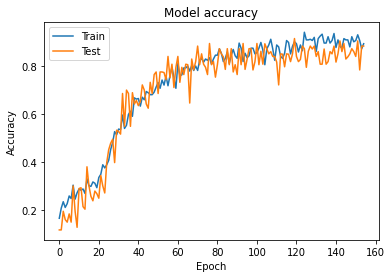

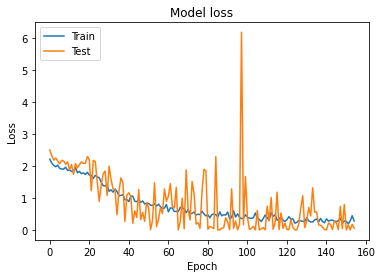

Model saved


In [249]:
model = create_model()
mode = train_validate_model(model)
save(model)
print('Model saved')

In [2]:
my_model=load_model('birds3.h5')

In [3]:
my_model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_194 (Conv2D)          (None, 199, 199, 32)      416       
_________________________________________________________________
max_pooling2d_192 (MaxPoolin (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_195 (Conv2D)          (None, 98, 98, 32)        4128      
_________________________________________________________________
max_pooling2d_193 (MaxPoolin (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_196 (Conv2D)          (None, 48, 48, 64)        8256      
_________________________________________________________________
max_pooling2d_194 (MaxPoolin (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_197 (Conv2D)          (None, 23, 23, 64)      

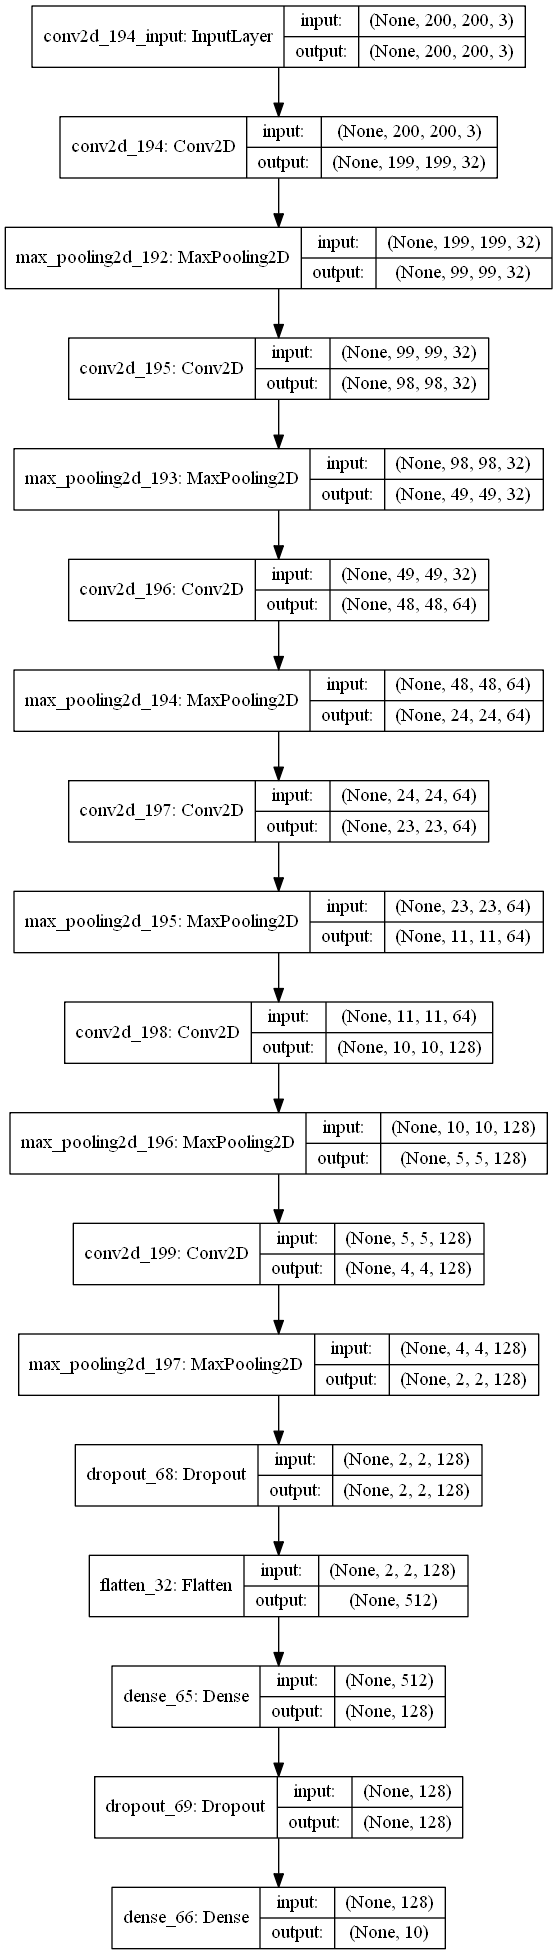

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(my_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [250]:
import cv2
image = cv2.imread('dataset_bird/HOUSE SPARROW/////5.jpg')
img = cv2.resize(image,(200,200))
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = np.expand_dims(img,2)

print(img.shape)
img = np.expand_dims(img,axis=0)
p[np.argmax(model.predict(img))]


(200, 200, 1)


ValueError: Error when checking input: expected conv2d_194_input to have shape (200, 200, 3) but got array with shape (200, 200, 1)

In [278]:
import cv2
for i in range(125,162):
    image = cv2.imread('dataTest_bird/BALD EAGLE/'+str(i)+'.jpg')
    img = cv2.resize(image,(200,200))
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# img = np.expand_dims(img,2)
    img = np.expand_dims(img,axis=0)
    print(p[np.argmax(model.predict(img))])


GOLDEN CHEEKED WARBLER
BARN OWL
NICOBAR PIGEON
BALD EAGLE
BALD EAGLE
CROW
BARN OWL
GOLDEN CHEEKED WARBLER
BALD EAGLE
TEAL DUCK
BALD EAGLE
BARN OWL
BARN OWL
ROBIN
BARN OWL
BARN OWL
TEAL DUCK
TEAL DUCK
GOLDEN CHEEKED WARBLER
BALD EAGLE


error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-durgkkoo\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


TypeError: 'type' object is not subscriptable

In [140]:
l

[<generator object walk at 0x00000186C4E09048>]

In [47]:
p

['ALBATROSS',
 'ANNAS HUMMINGBIRD',
 'BALD EAGLE',
 'BARN OWL',
 'CROW',
 'EMU',
 'HOUSE SPARROW',
 'NICOBAR PIGEON',
 'ROBIN',
 'TEAL DUCK']

In [281]:
model.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_194 (Conv2D)          (None, 199, 199, 32)      416       
_________________________________________________________________
max_pooling2d_192 (MaxPoolin (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_195 (Conv2D)          (None, 98, 98, 32)        4128      
_________________________________________________________________
max_pooling2d_193 (MaxPoolin (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_196 (Conv2D)          (None, 48, 48, 64)        8256      
_________________________________________________________________
max_pooling2d_194 (MaxPoolin (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_197 (Conv2D)          (None, 23, 23, 64)      

In [98]:
my_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 199, 199, 32)      416       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 98, 98, 32)        4128      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 76832)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)              